In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsforecast import StatsForecast

In [91]:
import yfinance as yf
import pandas as pd
import numpy as np

stock_symbol = "BEL.NS"
stock_data = yf.Ticker(stock_symbol)
latest_price = stock_data.history(period="1y")
new_index = pd.date_range(latest_price.index.min(), latest_price.index.max())
latest_price = latest_price.reindex(new_index, fill_value=None)

In [92]:
latest_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2024-06-12 00:00:00+05:30,285.540806,290.599021,283.705960,288.119507,33990756.0,0.0,0.0
2024-06-13 00:00:00+05:30,291.491657,300.517093,284.697782,298.434296,49511492.0,0.0,0.0
2024-06-14 00:00:00+05:30,302.500677,307.955607,299.029358,307.062988,67366844.0,0.0,0.0
2024-06-15 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-16 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-06-08 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-09 00:00:00+05:30,394.000000,395.299988,391.799988,392.450012,13744521.0,0.0,0.0
2025-06-10 00:00:00+05:30,396.500000,401.850006,394.700012,397.399994,26456073.0,0.0,0.0
2025-06-11 00:00:00+05:30,398.250000,398.250000,390.600006,392.899994,18042738.0,0.0,0.0


In [93]:
latest_price['ds'] = new_index

In [94]:
latest_price['unique_id'] = new_index

In [95]:
latest_price = latest_price.rename(columns={'Close': 'y'})

In [96]:
latest_price

,Open,High,Low,y,Volume,Dividends,Stock Splits,ds,unique_id
2024-06-12 00:00:00+05:30,285.540806,290.599021,283.705960,288.119507,33990756.0,0.0,0.0,2024-06-12 00:00:00+05:30,2024-06-12 00:00:00+05:30
2024-06-13 00:00:00+05:30,291.491657,300.517093,284.697782,298.434296,49511492.0,0.0,0.0,2024-06-13 00:00:00+05:30,2024-06-13 00:00:00+05:30
2024-06-14 00:00:00+05:30,302.500677,307.955607,299.029358,307.062988,67366844.0,0.0,0.0,2024-06-14 00:00:00+05:30,2024-06-14 00:00:00+05:30
2024-06-15 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-15 00:00:00+05:30,2024-06-15 00:00:00+05:30
2024-06-16 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-16 00:00:00+05:30,2024-06-16 00:00:00+05:30
...,...,...,...,...,...,...,...,...,...
2025-06-08 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-08 00:00:00+05:30,2025-06-08 00:00:00+05:30
2025-06-09 00:00:00+05:30,394.000000,395.299988,391.799988,392.450012,13744521.0,0.0,0.0,2025-06-09 00:00:00+05:30,2025-06-09 00:00:00+05:30
2025-06-10 00:00:00+05:30,396.500000,401.850006,394.700012,397.399994,26456073.0,0.0,0.0,2025-06-10 00:00:00+05:30,2025-06-10 00:00:00+05:30
2025-06-11 00:00:00+05:30,398.250000,398.250000,390.600006,392.899994,18042738.0,0.0,0.0,2025-06-11 00:00:00+05:30,2025-06-11 00:00:00+05:30


In [97]:
latest_price['y'] = latest_price['y'].interpolate()

In [98]:
latest_price

,Open,High,Low,y,Volume,Dividends,Stock Splits,ds,unique_id
2024-06-12 00:00:00+05:30,285.540806,290.599021,283.705960,288.119507,33990756.0,0.0,0.0,2024-06-12 00:00:00+05:30,2024-06-12 00:00:00+05:30
2024-06-13 00:00:00+05:30,291.491657,300.517093,284.697782,298.434296,49511492.0,0.0,0.0,2024-06-13 00:00:00+05:30,2024-06-13 00:00:00+05:30
2024-06-14 00:00:00+05:30,302.500677,307.955607,299.029358,307.062988,67366844.0,0.0,0.0,2024-06-14 00:00:00+05:30,2024-06-14 00:00:00+05:30
2024-06-15 00:00:00+05:30,NaN,NaN,NaN,309.207764,NaN,NaN,NaN,2024-06-15 00:00:00+05:30,2024-06-15 00:00:00+05:30
2024-06-16 00:00:00+05:30,NaN,NaN,NaN,311.352539,NaN,NaN,NaN,2024-06-16 00:00:00+05:30,2024-06-16 00:00:00+05:30
...,...,...,...,...,...,...,...,...,...
2025-06-08 00:00:00+05:30,NaN,NaN,NaN,391.866679,NaN,NaN,NaN,2025-06-08 00:00:00+05:30,2025-06-08 00:00:00+05:30
2025-06-09 00:00:00+05:30,394.000000,395.299988,391.799988,392.450012,13744521.0,0.0,0.0,2025-06-09 00:00:00+05:30,2025-06-09 00:00:00+05:30
2025-06-10 00:00:00+05:30,396.500000,401.850006,394.700012,397.399994,26456073.0,0.0,0.0,2025-06-10 00:00:00+05:30,2025-06-10 00:00:00+05:30
2025-06-11 00:00:00+05:30,398.250000,398.250000,390.600006,392.899994,18042738.0,0.0,0.0,2025-06-11 00:00:00+05:30,2025-06-11 00:00:00+05:30


In [99]:
df = latest_price[['unique_id', 'ds', 'y']].copy()

Additive Decomposition:

Seasonal Component: Has a constant absolute amplitude (the size of seasonal swings is the same regardless of the series' level) - Constant Osciallation.
Residual Component: Is centered around 0 and has constant absolute variance (the noise or error around the trend is the same size, in absolute terms, throughout the series) - Homoscedasticity
Multiplicative Decomposition:

Seasonal Component: Has a constant relative (percentage) amplitude (the size of seasonal swings scales proportionally with the series' level) - Constant Osciallation.
Residual Component: Is centered around 1.0 and has constant relative (percentage) variance (the noise or error scales proportionally with the series' level) - Homoscedasticity

Then what is the difference , it is in the formulas, one is additive and the other is ratios.

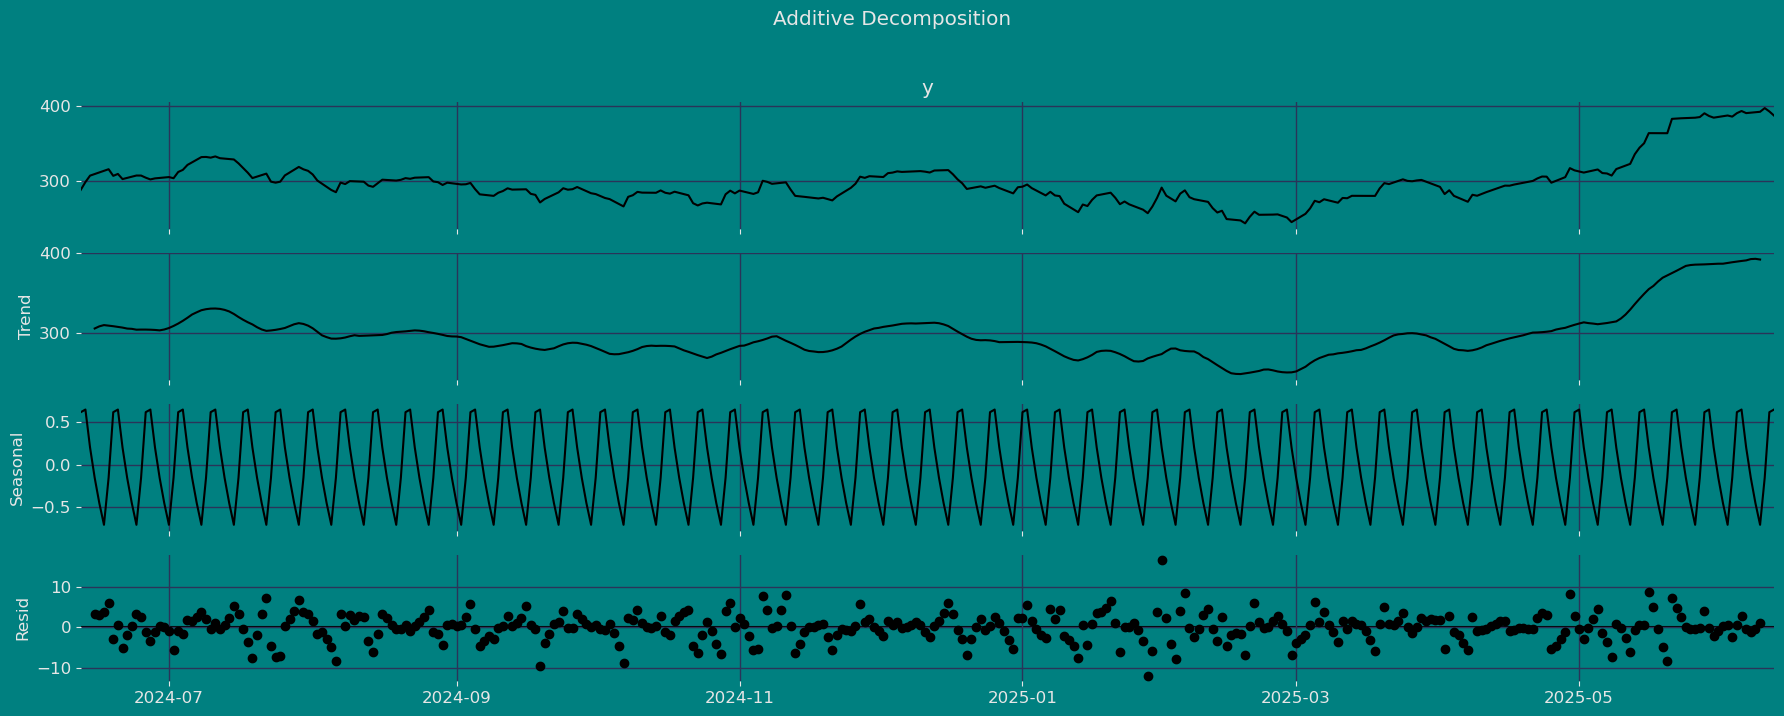

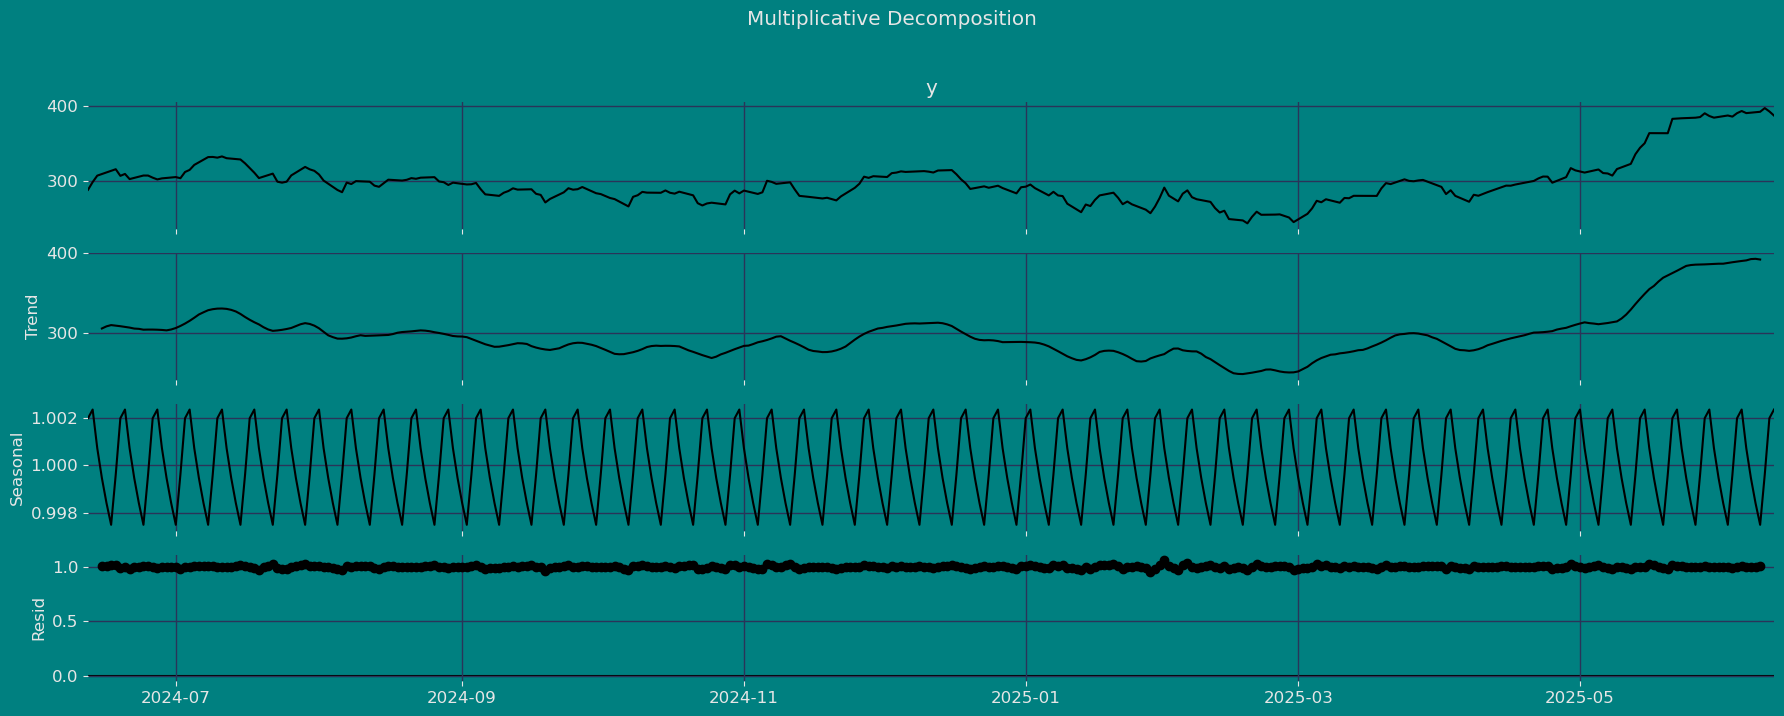

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

# For additive model (constant seasonal amplitude)
decomposition_additive = seasonal_decompose(df['y'], model='additive', period=7) # period=7 for weekly seasonality
decomposition_additive.plot()
plt.suptitle('Additive Decomposition', y=1.02)
plt.tight_layout()
plt.show()

# For multiplicative model (seasonal amplitude proportional to trend)
# Check if data has non-zero values for multiplicative decomposition
if (df['y'] > 0).all():
    decomposition_multiplicative = seasonal_decompose(df['y'], model='multiplicative', period=7)
    decomposition_multiplicative.plot()
    plt.suptitle('Multiplicative Decomposition', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Multiplicative decomposition requires all values to be positive.")

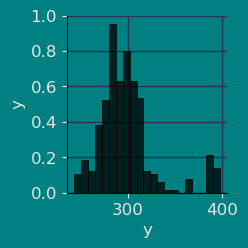

In [101]:
import seaborn as sns
sns.pairplot(df)

In [102]:
from coreforecast.scalers import boxcox_lambda
t = boxcox_lambda(df['y'], method = 'guerrero',season_length=7)


In [103]:
# from coreforecast.scalers import boxcox
# df['y'] = boxcox(df['y'],lmbda=t)

In [104]:
from coreforecast.seasonal import find_season_length
season_length = find_season_length(df['y'], max_season_length=28, )
season_length

0

In [105]:
# import seaborn as sns
# df['3-MA'] = df['y'].rolling(window=3).mean()
# df['5-MA'] = df['3-MA'].rolling(window=2).mean()

# fig, ax = plt.subplots(figsize=(10, 6))
# sns.lineplot(x=df.index, y=df['y'], ax=ax, label='Open Price')
# sns.lineplot(x=df.index, y=df['3-MA'], ax=ax, label='3-MA', color='orange')
# sns.lineplot(x=df.index, y=df['5-MA'], ax=ax, label='5-MA', color='Blue')

# plt.title('Open Price and 5-MA')

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#008080',  # #212946
    'axes.facecolor': '#008080',
    'savefig.facecolor': '#008080',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': "#2A3459",  #2A3459
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)


from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

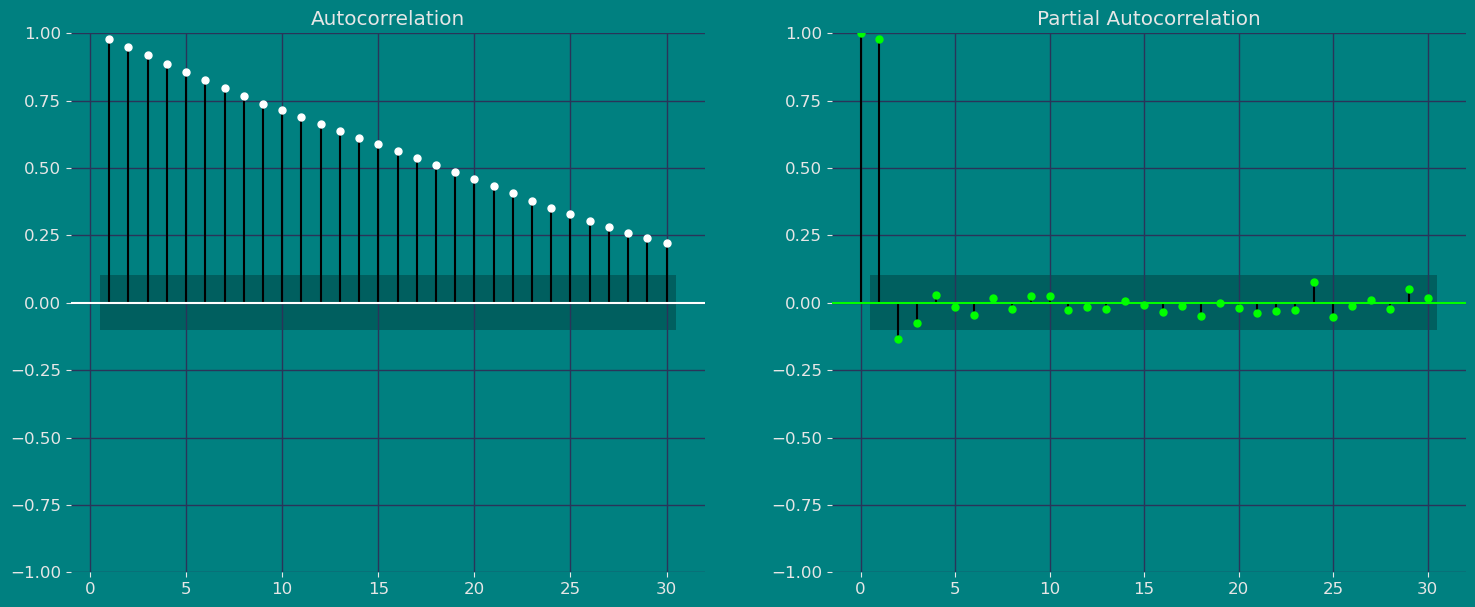

In [107]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df['y'],  lags=30, ax=axs[0],color="white",bartlett_confint=False, 
         alpha=0.05, use_vlines=True, zero=False)
axs[0].set_title("Autocorrelation");

plot_pacf(df['y'],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show()

acorr_ljungbox -  Used to check if there is any autocorrelation with the time series, the number of lags is typically ln(N), observations

In [108]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(df['y'], lags=[6])
ljung_box

,lb_stat,lb_pvalue
6,1821.996661,0.0


KPSS is a test to check the stationarity, a p - value of 0.01 indicates the null hypothesis is rejected i.e., we simply indicate the series is not stationary.
2. Differencing is needed if p - value is less than or equal to 0.01.
Test for trend stationarity or Level stationarity.

In [109]:
from statsmodels.tsa.stattools import kpss
goog_kpss_stat, goog_kpss_pvalue, _, _ = kpss(df['y'], nlags=6)

if goog_kpss_pvalue < 0.05:
   
    print(f"The series is NOT stationary (KPSS test p-value < 0.05) kpss_stat: {goog_kpss_stat:.3f}, kpss_pvalue: {goog_kpss_pvalue:.2f}")
else:
    print(f"The series is stationary (KPSS test p-value >= 0.05) kpss_stat: {goog_kpss_stat:.3f}, kpss_pvalue: {goog_kpss_pvalue:.2f} \ng")

The series is NOT stationary (KPSS test p-value < 0.05) kpss_stat: 0.850, kpss_pvalue: 0.01


/tmp/ipykernel_7804/4096482226.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  goog_kpss_stat, goog_kpss_pvalue, _, _ = kpss(df['y'], nlags=6)


The resultant difference is clearly waht can be assumed as stationary given the p-value is 0.1.

In [110]:
from statsmodels.tsa.stattools import kpss
goog_kpss_stat, goog_kpss_pvalue, _, _ = kpss(df['y'].diff()[1:], nlags=7)
if goog_kpss_pvalue < 0.05:
   
    print(f"The series is NOT stationary (KPSS test p-value < 0.05) kpss_stat: {goog_kpss_stat:.3f}, kpss_pvalue: {goog_kpss_pvalue:.2f}")
else:
    print(f"The series IS stationary (KPSS test p-value >= 0.05) kpss_stat: {goog_kpss_stat:.3f}, kpss_pvalue: {goog_kpss_pvalue:.2f} \ng")


The series IS stationary (KPSS test p-value >= 0.05) kpss_stat: 0.264, kpss_pvalue: 0.10 
g


/tmp/ipykernel_7804/3017820846.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  goog_kpss_stat, goog_kpss_pvalue, _, _ = kpss(df['y'].diff()[1:], nlags=7)


The method ndiffs gives you the number of the differences to make the series stationary.

Null hypothesis of ADF test is Non stationarity opposite of KPSS test, test for unit root.

Both ADF and KPSS suggest stationarity: (ADF p-value ≤ 0.05, KPSS p-value > 0.05) ⟹ Strong evidence for stationarity.
Both ADF and KPSS suggest non-stationarity: (ADF p-value > 0.05, KPSS p-value ≤ 0.05) ⟹ Strong evidence for non-stationarity.
ADF suggests stationarity, KPSS suggests non-stationarity: This is contradictory. It might indicate that the series is trend-stationary (stationary after detrending). You would typically detrend the series and then re-run tests on the residuals.
ADF suggests non-stationarity, KPSS suggests stationarity: This is also contradictory and less common. It might suggest a problem with the test parameters (e.g., number of lags) or a borderline case.

In [111]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['y'])
if adf_result[1] < 0.05:
    print(f"The series is stationary (ADF test p-value < 0.05) {adf_result[1]:.3f}")
else:
    print(f"The series is NOT stationary (ADF test p-value >= 0.05), {adf_result[1]:.3f}")

The series is NOT stationary (ADF test p-value >= 0.05), 0.890


In [115]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['y'].diff()[1:])
if adf_result[1] < 0.05:
    print(f"The series is stationary (ADF test p-value < 0.05) {adf_result[1]:.3f}")
else:
    print(f"The series is NOT stationary (ADF test p-value >= 0.05), {adf_result[1]:.3f}")

The series is stationary (ADF test p-value < 0.05) 0.000


In [112]:
if goog_kpss_pvalue >= 0.05 and adf_result[1] < 0.05:
    print("The series is stationary (KPSS p-value >= 0.05 and ADF p-value < 0.05)")

In [113]:
from pmdarima.arima.utils import ndiffs, nsdiffs
ndiffs(df['y'].values)

/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:1

1

nsdiffs gives the number of the seasonal difference required to make the series stationary.

In [116]:
nsdiffs(df['y'],m =7)

/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0

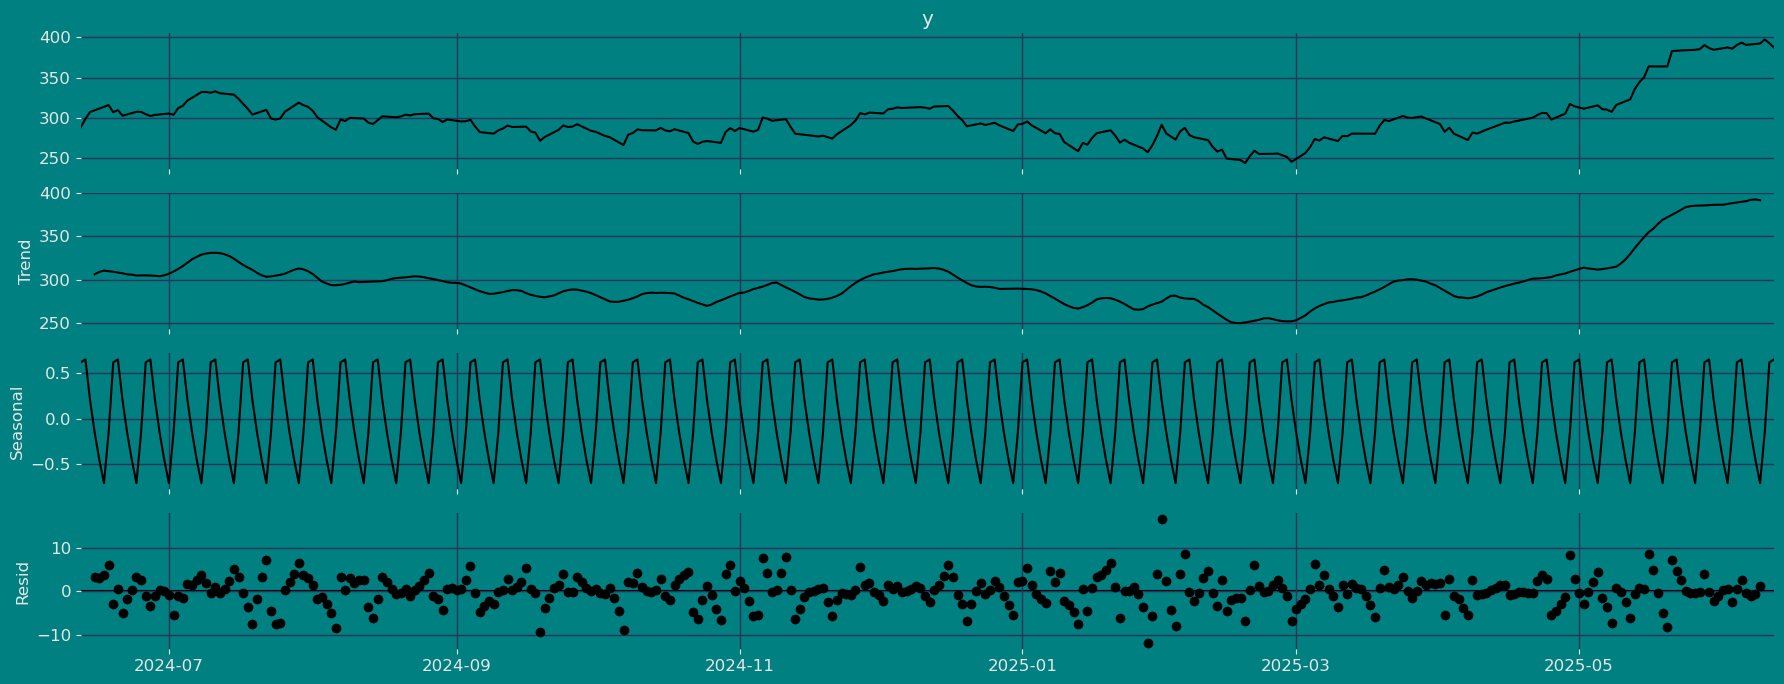

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df['y'], model = "additive", period=7)
a.plot();

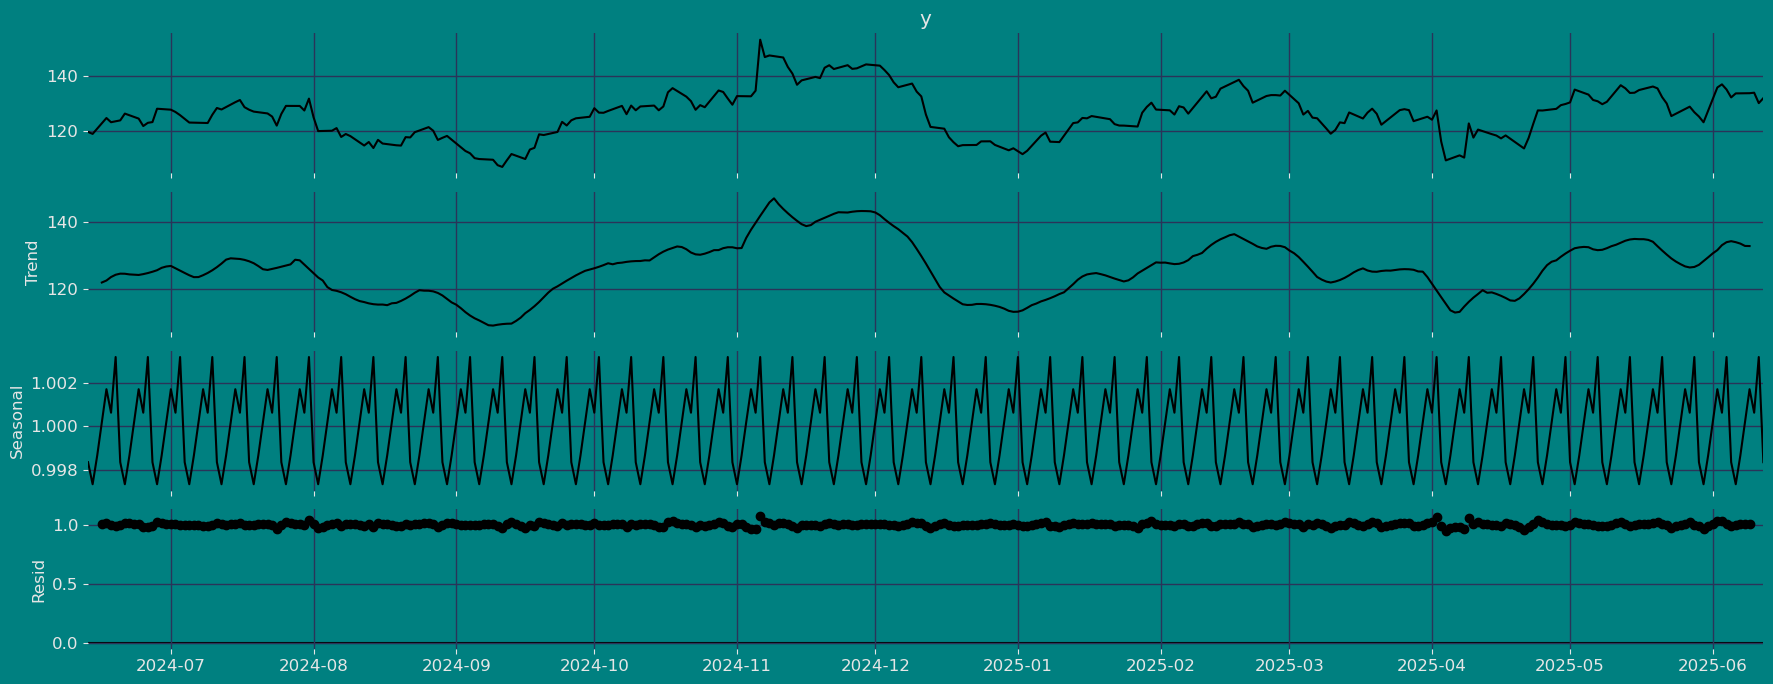

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df['y'], model = "multiplicative", period=7)
a.plot();

In [64]:
df['y_diff'] = df['y'].diff()

In [65]:
df['y_diff'].isna().sum()

1

In [66]:
df['y_diff'].fillna(method='bfill', inplace=True)

/tmp/ipykernel_7804/1552330493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['y_diff'].fillna(method='bfill', inplace=True)
/tmp/ipykernel_7804/1552330493.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['y_diff'].fillna(method='bfill', inplace=True)


In [67]:
df

,unique_id,ds,y,y_diff
2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,2024-06-13 00:00:00-04:00,119.560257,-0.718811
2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00,2024-06-14 00:00:00-04:00,118.841446,-0.718811
2024-06-15 00:00:00-04:00,2024-06-15 00:00:00-04:00,2024-06-15 00:00:00-04:00,120.764860,1.923414
2024-06-16 00:00:00-04:00,2024-06-16 00:00:00-04:00,2024-06-16 00:00:00-04:00,122.688273,1.923414
2024-06-17 00:00:00-04:00,2024-06-17 00:00:00-04:00,2024-06-17 00:00:00-04:00,124.611687,1.923414
...,...,...,...,...
2025-06-08 00:00:00-04:00,2025-06-08 00:00:00-04:00,2025-06-08 00:00:00-04:00,133.606669,0.023336
2025-06-09 00:00:00-04:00,2025-06-09 00:00:00-04:00,2025-06-09 00:00:00-04:00,133.630005,0.023336
2025-06-10 00:00:00-04:00,2025-06-10 00:00:00-04:00,2025-06-10 00:00:00-04:00,133.809998,0.179993
2025-06-11 00:00:00-04:00,2025-06-11 00:00:00-04:00,2025-06-11 00:00:00-04:00,130.029999,-3.779999


In [68]:
goog_kpss_stat, goog_kpss_pvalue, _, _ = kpss(df['y_diff'], nlags=6)

if goog_kpss_pvalue < 0.05:
   
    print(f"The series is NOT stationary (KPSS test p-value < 0.05) kpss_stat: {goog_kpss_stat:.3f}, kpss_pvalue: {goog_kpss_pvalue:.2f}")
else:
    print(f"The series is stationary (KPSS test p-value >= 0.05) kpss_stat: {goog_kpss_stat:.3f}, kpss_pvalue: {goog_kpss_pvalue:.2f} \ng")

The series is stationary (KPSS test p-value >= 0.05) kpss_stat: 0.037, kpss_pvalue: 0.10 
g


/tmp/ipykernel_7804/4112618902.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  goog_kpss_stat, goog_kpss_pvalue, _, _ = kpss(df['y_diff'], nlags=6)


In [69]:
adf_result = adfuller(df['y_diff'])
if adf_result[1] < 0.05:
    print(f"The series is stationary (ADF test p-value < 0.05) {adf_result[1]:.3f}")
else:
    print(f"The series is NOT stationary (ADF test p-value >= 0.05), {adf_result[1]:.3f}")

The series is stationary (ADF test p-value < 0.05) 0.000


1.h (Forecast Horizon)
What it means: h stands for the forecast horizon. It is the number of steps (or periods) into the future for which you want to generate a prediction and its associated conformal interval.

If your data is daily and you set h=7, you are asking for a forecast and prediction interval for the next 7 days.
If your data is monthly and you set h=1, you are asking for a forecast and prediction interval for the next month.
How to choose h: This parameter is determined purely by your forecasting objective or business need.

Do you need to predict demand for tomorrow? h=1.
Are you planning inventory for the next quarter (and your data is monthly)? h=3.
Do you need to estimate workload for the next week (and your data is daily)? h=7.
You choose h based on what you want to predict.
2. n_windows (Number of Calibration Windows)
What it means: n_windows refers to the number of historical "windows" or segments of data that the Conformal Prediction algorithm will use to calibrate its prediction intervals.

In essence, the algorithm will perform a "backtest" or "walk-forward validation" on your historical data. It will take n_windows different snapshots of your past, train your model on each snapshot, and then make an h-step forecast.
It collects the non-conformity scores (e.g., the absolute errors) from these n_windows historical h-step forecasts. These collected scores then form an empirical distribution from which the boundaries of your future prediction intervals are derived.

In [142]:
from statsforecast.models import SeasonalExponentialSmoothing, ADIDA, ARIMA
from statsforecast.utils import ConformalIntervals

# Create a list of models and instantiation parameters 
intervals = ConformalIntervals(h=7, n_windows=2)
# P.S. n_windows*h should be less than the count of data elements in your time series sequence.
# P.S. Also value of n_windows should be atleast 2 or more.

models = [
    #SeasonalExponentialSmoothing(season_length=7, alpha=0.1, prediction_intervals=intervals),
    #ADIDA(prediction_intervals=intervals),
    ARIMA(order=(30,1,0)),

    #ARIMA(order=(30,1,0), prediction_intervals=intervals),
]

In [119]:
from sklearn.linear_model import LinearRegression
from utilsforecast.feature_engineering import trend

from statsforecast import StatsForecast
from statsforecast.models import MSTL, SklearnModel

In [125]:
df['unique_id'] = 'AAPL'

In [73]:
df = df[['unique_id', 'ds', 'y_diff']].copy()

In [74]:
df = df[['unique_id', 'ds', 'y']].copy()

KeyError: "['y'] not in index"

In [85]:
df = df.rename(columns={'y_diff': 'y'})

In [126]:
df

,unique_id,ds,y
2024-06-12 00:00:00+05:30,AAPL,2024-06-12 00:00:00+05:30,288.119507
2024-06-13 00:00:00+05:30,AAPL,2024-06-13 00:00:00+05:30,298.434296
2024-06-14 00:00:00+05:30,AAPL,2024-06-14 00:00:00+05:30,307.062988
2024-06-15 00:00:00+05:30,AAPL,2024-06-15 00:00:00+05:30,309.207764
2024-06-16 00:00:00+05:30,AAPL,2024-06-16 00:00:00+05:30,311.352539
...,...,...,...
2025-06-08 00:00:00+05:30,AAPL,2025-06-08 00:00:00+05:30,391.866679
2025-06-09 00:00:00+05:30,AAPL,2025-06-09 00:00:00+05:30,392.450012
2025-06-10 00:00:00+05:30,AAPL,2025-06-10 00:00:00+05:30,397.399994
2025-06-11 00:00:00+05:30,AAPL,2025-06-11 00:00:00+05:30,392.899994


In [121]:
from sklearn.model_selection import TimeSeriesSplit
from statsforecast.models import AutoARIMA
tscv = TimeSeriesSplit(n_splits=5)

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, mse, rmse, mape

In [124]:
df

,unique_id,ds,y
2024-06-12 00:00:00+05:30,AAPL,2024-06-12 00:00:00+05:30,288.119507
2024-06-13 00:00:00+05:30,AAPL,2024-06-13 00:00:00+05:30,298.434296
2024-06-14 00:00:00+05:30,AAPL,2024-06-14 00:00:00+05:30,307.062988
2024-06-15 00:00:00+05:30,AAPL,2024-06-15 00:00:00+05:30,309.207764
2024-06-16 00:00:00+05:30,AAPL,2024-06-16 00:00:00+05:30,311.352539
...,...,...,...
2025-06-08 00:00:00+05:30,AAPL,2025-06-08 00:00:00+05:30,391.866679
2025-06-09 00:00:00+05:30,AAPL,2025-06-09 00:00:00+05:30,392.450012
2025-06-10 00:00:00+05:30,AAPL,2025-06-10 00:00:00+05:30,397.399994
2025-06-11 00:00:00+05:30,AAPL,2025-06-11 00:00:00+05:30,392.899994


In [79]:
mstl_model = MSTL(season_length=[7], trend_forecaster=AutoARIMA(prediction_intervals=ConformalIntervals(h=7, n_windows=50)))

In [143]:
sf = StatsForecast(
    models=[models], # model used to fit each time series 
    freq='D', # frequency of the data
)

In [138]:
df

,unique_id,ds,y
2024-06-12 00:00:00+05:30,AAPL,2024-06-12 00:00:00+05:30,288.119507
2024-06-13 00:00:00+05:30,AAPL,2024-06-13 00:00:00+05:30,298.434296
2024-06-14 00:00:00+05:30,AAPL,2024-06-14 00:00:00+05:30,307.062988
2024-06-15 00:00:00+05:30,AAPL,2024-06-15 00:00:00+05:30,309.207764
2024-06-16 00:00:00+05:30,AAPL,2024-06-16 00:00:00+05:30,311.352539
...,...,...,...
2025-06-08 00:00:00+05:30,AAPL,2025-06-08 00:00:00+05:30,391.866679
2025-06-09 00:00:00+05:30,AAPL,2025-06-09 00:00:00+05:30,392.450012
2025-06-10 00:00:00+05:30,AAPL,2025-06-10 00:00:00+05:30,397.399994
2025-06-11 00:00:00+05:30,AAPL,2025-06-11 00:00:00+05:30,392.899994


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2024-06-12 00:00:00+05:30 to 2024-08-11 00:00:00+05:30
Freq: D
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                       
---  ------     --------------  -----                       
 0   unique_id  61 non-null     object                      
 1   ds         61 non-null     datetime64[ns, Asia/Kolkata]
 2   y          61 non-null     float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(1), object(1)
memory usage: 1.9+ KB


In [151]:
for i in tscv.split(df):
    train_index, test_index = i
    train, test = df.iloc[train_index], df.iloc[test_index]
    sf.fit(train)
    preds = sf.predict(len(test))
    mae, mse, rmse, mape = evaluate_forecast(test['y'], preds['ARIMA'])
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}")
    print(f"Train size: {len(train)}, Test size: {len(test)}")

MAE: 11.36, MSE: 196.83, RMSE: 14.03, MAPE: 0.04
Train size: 61, Test size: 61
MAE: 12.11, MSE: 261.05, RMSE: 16.16, MAPE: 0.04
Train size: 122, Test size: 61
MAE: 28.31, MSE: 984.10, RMSE: 31.37, MAPE: 0.10
Train size: 183, Test size: 61
MAE: 15.09, MSE: 317.14, RMSE: 17.81, MAPE: 0.06
Train size: 244, Test size: 61
MAE: 57.76, MSE: 4855.38, RMSE: 69.68, MAPE: 0.16
Train size: 305, Test size: 61


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-06-12 00:00:00+05:30 to 2025-06-12 00:00:00+05:30
Freq: D
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                       
---  ------     --------------  -----                       
 0   unique_id  366 non-null    object                      
 1   ds         366 non-null    datetime64[ns, Asia/Kolkata]
 2   y          366 non-null    float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(1), object(1)
memory usage: 11.4+ KB


In [88]:
sf = sf.fit(df)

In [158]:
sf.fitted_[0, 0].model_['residuals']

array([ 2.88119344e-01,  9.71358516e+00,  6.43484353e+00,  1.79019775e-01,
        1.92765264e+00,  2.17152013e+00,  1.60907391e+00, -8.08859904e+00,
        5.49236893e+00, -5.45087905e+00,  2.82570567e+00,  2.78662605e+00,
        2.00065810e+00, -9.90609316e-01, -2.07697003e+00, -1.20527855e+00,
        2.44286824e+00, -4.86318425e-01, -5.06985121e-01,  1.49158964e+00,
       -1.57532433e+00,  7.62209977e+00,  6.48032712e-01,  5.84461805e+00,
        2.96282446e+00,  2.49356605e+00,  4.38855253e+00,  7.28703747e-01,
       -2.65461724e-01,  2.74024747e+00, -8.90921880e-03,  2.42469525e+00,
        6.10253551e-01, -1.05314644e-01, -4.28643756e+00, -4.74360033e+00,
       -3.45036929e+00, -6.39338320e+00,  2.48755967e+00,  1.68707794e+00,
        2.68251424e-01, -1.15288017e+01, -6.40688186e-01,  1.27309284e+00,
        6.50244883e+00,  7.14422461e-01,  3.50782875e+00,  3.27900367e+00,
       -5.05572989e+00, -2.17728599e+00, -3.31867435e+00, -5.80811724e+00,
       -1.94334858e+00, -

In [160]:
acorr_ljungbox(sf.fitted_[0, 0].model_['residuals'], lags=[30])

,lb_stat,lb_pvalue
30,1.734095,1.0


In [44]:
import ruptures as rpt  # our package


In [45]:
m = df['y'].median()

In [47]:
sf.fitted_[0, 0].model_

,data,trend,seasonal,remainder
0,206.185730,210.290962,0.148697,-4.253929
1,212.078201,210.843367,0.939897,0.294937
2,213.242737,211.316455,-0.351291,2.277572
3,211.500870,211.723512,-0.813006,0.590364
4,212.887721,212.069682,-0.385049,1.203088
...,...,...,...,...
360,203.919998,202.339078,-0.800305,2.381225
361,203.096664,202.336145,-0.507049,1.267568
362,202.273331,202.333433,-0.210080,0.149978
363,201.449997,202.316857,0.086568,-0.953427


In [50]:
df

,unique_id,ds,y
2024-06-11 00:00:00-04:00,AAPL,2024-06-11 00:00:00-04:00,206.185730
2024-06-12 00:00:00-04:00,AAPL,2024-06-12 00:00:00-04:00,212.078201
2024-06-13 00:00:00-04:00,AAPL,2024-06-13 00:00:00-04:00,213.242737
2024-06-14 00:00:00-04:00,AAPL,2024-06-14 00:00:00-04:00,211.500870
2024-06-15 00:00:00-04:00,AAPL,2024-06-15 00:00:00-04:00,212.887721
...,...,...,...
2025-06-06 00:00:00-04:00,AAPL,2025-06-06 00:00:00-04:00,203.919998
2025-06-07 00:00:00-04:00,AAPL,2025-06-07 00:00:00-04:00,203.096664
2025-06-08 00:00:00-04:00,AAPL,2025-06-08 00:00:00-04:00,202.273331
2025-06-09 00:00:00-04:00,AAPL,2025-06-09 00:00:00-04:00,201.449997


In [52]:
dcmp = sf.fitted_[0, 0].model_

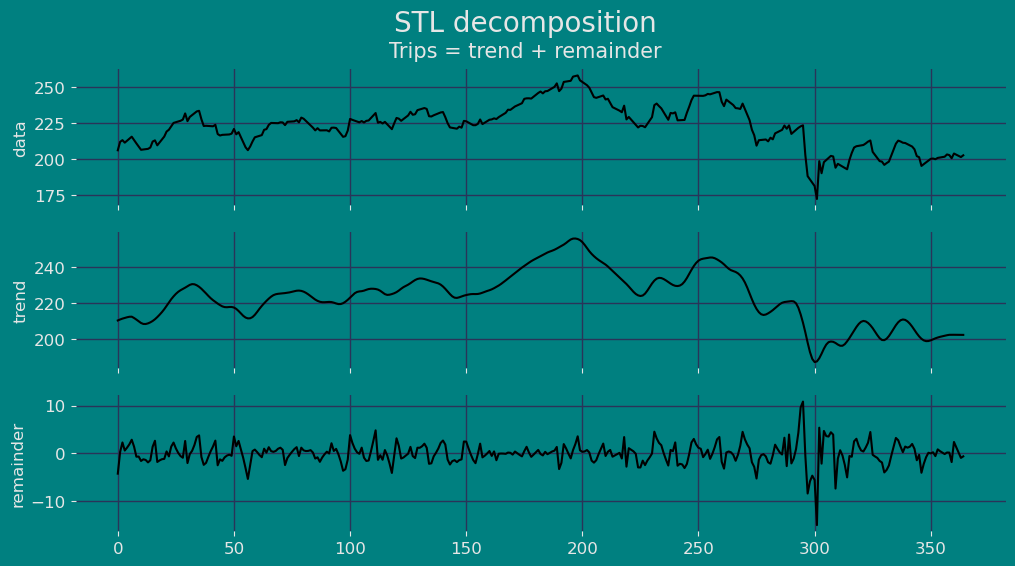

In [77]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), sharex=True)
sns.lineplot(data=dcmp, x=dcmp.index, y="data", ax=axes[0], color="black")
sns.lineplot(data=dcmp, x=dcmp.index, y="trend", ax=axes[1], color="black")
sns.lineplot(data=dcmp, x=dcmp.index, y="remainder", ax=axes[2], color="black")
fig.suptitle("STL decomposition", fontsize=20)
fig.text(0.5, 0.9, "Trips = trend + remainder", fontsize=15, ha='center')
#fig.subplots_adjust(top=0.93)
plt.xlabel("")
plt.show()

In [54]:
q1 = dcmp["remainder"].quantile(0.25)
q3 = dcmp["remainder"].quantile(0.75)
iqr = q3 - q1

outliers = dcmp.loc[(dcmp["remainder"] < (q1 - 3 * iqr)) | (dcmp["remainder"] > (q3 + 3 * iqr))]
outliers

,data,trend,seasonal,remainder
294,222.897705,213.648647,-0.387015,9.636073
295,223.596786,209.038313,3.714212,10.844261
297,188.133301,197.987208,-1.441997,-8.411910
301,172.194199,187.532324,-0.308027,-15.030099


In [60]:
df['y'].mean()

223.32227841729988

In [86]:
df['y'].iloc[364]

202.6699981689453

In [88]:
for i in result:
    df['y'].iloc[i-1] = 223

/tmp/ipykernel_41159/4154789873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'].iloc[i-1] = 223


In [80]:
algo = rpt.Dynp(model="l1").fit(df['y'].values)
result = algo.predict(n_bkps=10)

print(result)

[20, 40, 65, 170, 185, 205, 215, 245, 270, 295, 365]


In [163]:
sf.fitted_[0, 0].model_['residuals'].plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [148]:
sf = StatsForecast(models=models, freq='D', n_jobs=-1)

for i in tscv.split(df):
    train_index, test_index = i
    train, test = df.iloc[train_index], df.iloc[test_index]
    sf.fit(train)
    preds = sf.predict(len(test))
    mae, mse, rmse, mape = evaluate_forecast(test['y'], preds['ARIMA'])
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}")
    print(f"Train size: {len(train)}, Test size: {len(test)}")

MAE: 11.36, MSE: 196.83, RMSE: 14.03, MAPE: 0.04
Train size: 61, Test size: 61
MAE: 12.11, MSE: 261.05, RMSE: 16.16, MAPE: 0.04
Train size: 122, Test size: 61
MAE: 28.31, MSE: 984.10, RMSE: 31.37, MAPE: 0.10
Train size: 183, Test size: 61
MAE: 15.09, MSE: 317.14, RMSE: 17.81, MAPE: 0.06
Train size: 244, Test size: 61
MAE: 57.76, MSE: 4855.38, RMSE: 69.68, MAPE: 0.16
Train size: 305, Test size: 61


In [149]:
for i in tscv.split(df):
    train_index, test_index = i
    train, test = df.iloc[train_index], df.iloc[test_index]
    sf.fit(train)
    preds = sf.predict(len(test))
    mae, mse, rmse, mape = evaluate_forecast(test['y'], preds['SeasonalES'])
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}")
    print(f"Train size: {len(train)}, Test size: {len(test)}")

KeyError: 'SeasonalES'

In [2]:
x =2
if x == 2:
    print('2')
if x!=3:
    print('2')

2
2


In [1]:
import pydantic
print(pydantic.__version__)

2.10.6


In [92]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import ARIMASummary
from copy import deepcopy

models = [AutoARIMA(allowmean=False,prediction_intervals=intervals, d = 1)]

sf = StatsForecast(models=models, freq='D', n_jobs=-1)

sf.fit(df=df)

print(ARIMASummary(sf.fitted_[0, 0].model_))
coefs = deepcopy(sf.fitted_[0, 0].model_['coef'])
print(f"Coefficients: {coefs}")
print(f"sigma^2     : {sf.fitted_[0, 0].model_['sigma2']:.2f}")
print(f"loglik      : {sf.fitted_[0, 0].model_['loglik']:.2f}")
print(f"aic         : {sf.fitted_[0, 0].model_['aic']:.2f}")
print(f"aicc        : {sf.fitted_[0, 0].model_['aicc']:.2f}")
print(f"bic         : {sf.fitted_[0, 0].model_['bic']:.2f}")

ARIMA(0,1,2)                   
Coefficients: {'ma1': -0.28967312377219817, 'ma2': -0.14595215019090715}
sigma^2     : 25.90
loglik      : -1107.83
aic         : 2221.67
aicc        : 2221.74
bic         : 2233.36


In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-06-11 00:00:00-04:00 to 2025-06-10 00:00:00-04:00
Freq: D
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   unique_id  365 non-null    object                          
 1   ds         365 non-null    datetime64[ns, America/New_York]
 2   y          365 non-null    float64                         
dtypes: datetime64[ns, America/New_York](1), float64(1), object(1)
memory usage: 11.4+ KB


In [93]:
for i in tscv.split(df):
    train_index, test_index = i
    train, test = df.iloc[train_index], df.iloc[test_index]
    sf.fit(train)
    preds = sf.predict(len(test))
    mae, mse, rmse, mape = evaluate_forecast(test['y'], preds['AutoARIMA'])
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}")
    print(f"Train size: {len(train)}, Test size: {len(test)}")

/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/statsforecast/core.py:742: UserWarning: Prediction intervals are set but `level` was not provided. Predictions won't have intervals.
  warnings.warn(


MAE: 3.34, MSE: 14.56, RMSE: 3.82, MAPE: 0.01
Train size: 65, Test size: 60


/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/statsforecast/core.py:742: UserWarning: Prediction intervals are set but `level` was not provided. Predictions won't have intervals.
  warnings.warn(


MAE: 5.77, MSE: 53.89, RMSE: 7.34, MAPE: 0.02
Train size: 125, Test size: 60


/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/statsforecast/core.py:742: UserWarning: Prediction intervals are set but `level` was not provided. Predictions won't have intervals.
  warnings.warn(


MAE: 15.51, MSE: 368.59, RMSE: 19.20, MAPE: 0.06
Train size: 185, Test size: 60


/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/statsforecast/core.py:742: UserWarning: Prediction intervals are set but `level` was not provided. Predictions won't have intervals.
  warnings.warn(


MAE: 12.83, MSE: 250.70, RMSE: 15.83, MAPE: 0.06
Train size: 245, Test size: 60
MAE: 6.00, MSE: 61.71, RMSE: 7.86, MAPE: 0.03
Train size: 305, Test size: 60


/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/statsforecast/core.py:742: UserWarning: Prediction intervals are set but `level` was not provided. Predictions won't have intervals.
  warnings.warn(


In [581]:
df

,unique_id,ds,y
2024-06-11 00:00:00-04:00,AAPL,2024-06-11 00:00:00-04:00,206.185715
2024-06-12 00:00:00-04:00,AAPL,2024-06-12 00:00:00-04:00,212.078201
2024-06-13 00:00:00-04:00,AAPL,2024-06-13 00:00:00-04:00,213.242737
2024-06-14 00:00:00-04:00,AAPL,2024-06-14 00:00:00-04:00,211.500870
2024-06-15 00:00:00-04:00,AAPL,2024-06-15 00:00:00-04:00,212.887721
...,...,...,...
2025-06-06 00:00:00-04:00,AAPL,2025-06-06 00:00:00-04:00,203.919998
2025-06-07 00:00:00-04:00,AAPL,2025-06-07 00:00:00-04:00,203.096664
2025-06-08 00:00:00-04:00,AAPL,2025-06-08 00:00:00-04:00,202.273331
2025-06-09 00:00:00-04:00,AAPL,2025-06-09 00:00:00-04:00,201.449997


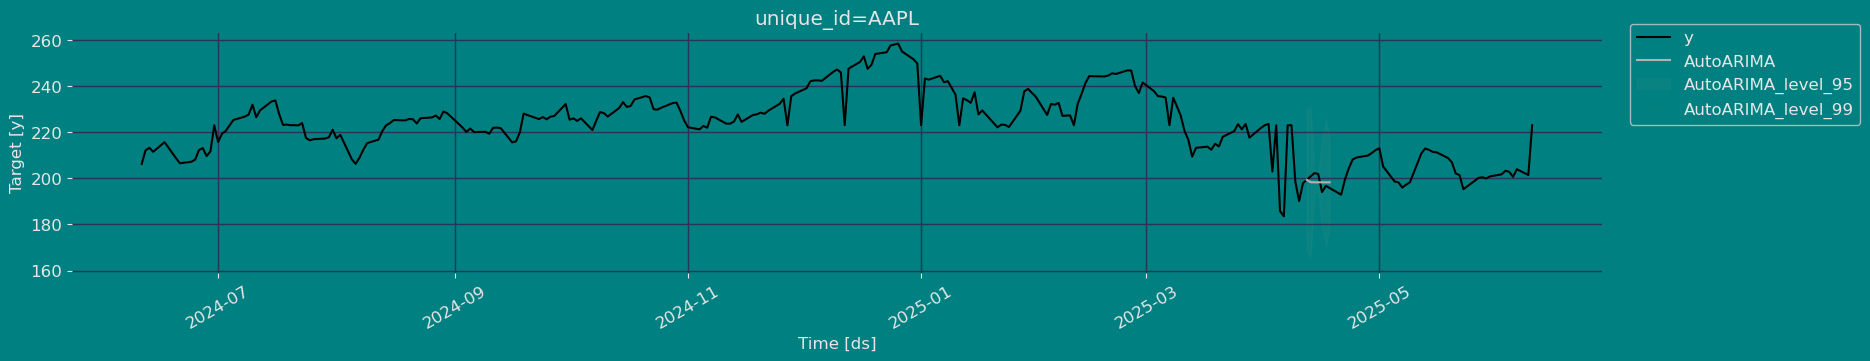

In [94]:
from utilsforecast.plotting import plot_series
levels = [95, 99]
forecasts = sf.predict(h=7,level=levels)
plot_series(
    df=df, forecasts_df=forecasts, level=levels
)

In [95]:
from statsforecast import StatsForecast
from statsforecast.models import AutoETS

In [97]:
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [98]:
models = [
    lgb.LGBMRegressor(random_state=0, verbosity=-1),
    LinearRegression(),
    KNeighborsRegressor(),
    Lasso(),
    MLPRegressor(max_iter = 1000),
    Ridge(),
]

In [99]:
from mlforecast import MLForecast
from mlforecast.lag_transforms import ExpandingMean, RollingMean
from mlforecast.target_transforms import Differences

In [100]:
fcst = MLForecast(
    models=models,
    freq='D',
    lags=[7, 14,28],
    lag_transforms={
        1: [ExpandingMean()],
        7: [RollingMean(window_size=28)]
    },
    target_transforms=[Differences([1])],
)

In [101]:
fcst.fit(df)

/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLForecast(models=[LGBMRegressor, LinearRegression, KNeighborsRegressor, Lasso, MLPRegressor, Ridge], freq=D, lag_features=['lag7', 'lag14', 'lag28', 'expanding_mean_lag1', 'rolling_mean_lag7_window_size28'], date_features=[], num_threads=1)

In [102]:
predictions = fcst.predict(14)
predictions

,unique_id,ds,LGBMRegressor,LinearRegression,KNeighborsRegressor,Lasso,MLPRegressor,Ridge
0,AAPL,2025-06-11 00:00:00-04:00,222.080648,223.607493,222.286505,223.013318,224.964003,223.438170
1,AAPL,2025-06-12 00:00:00-04:00,220.637304,224.214222,222.466394,223.075331,226.456904,223.895824
2,AAPL,2025-06-13 00:00:00-04:00,222.870264,224.814125,223.206708,223.027876,227.314313,224.346509
3,AAPL,2025-06-14 00:00:00-04:00,222.263853,225.374944,224.601526,223.059128,229.651596,224.782728
4,AAPL,2025-06-15 00:00:00-04:00,221.422337,225.902622,225.996344,223.090380,232.060950,225.215844
5,AAPL,2025-06-16 00:00:00-04:00,219.063398,226.397781,227.656698,223.121632,234.386456,225.645929
6,AAPL,2025-06-17 00:00:00-04:00,221.508796,227.710508,229.812234,223.207257,234.794719,226.820797
7,AAPL,2025-06-18 00:00:00-04:00,217.196972,228.860775,228.253005,223.619707,233.354121,227.798265
8,AAPL,2025-06-19 00:00:00-04:00,213.994406,229.603267,227.465775,223.727421,231.178242,228.373257
9,AAPL,2025-06-20 00:00:00-04:00,215.222701,230.662200,230.511030,224.130205,233.480447,229.256488


In [103]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

In [105]:
test

,unique_id,ds,y
2025-04-12 00:00:00-04:00,AAPL,2025-04-12 00:00:00-04:00,199.345250
2025-04-13 00:00:00-04:00,AAPL,2025-04-13 00:00:00-04:00,200.800013
2025-04-14 00:00:00-04:00,AAPL,2025-04-14 00:00:00-04:00,202.254776
2025-04-15 00:00:00-04:00,AAPL,2025-04-15 00:00:00-04:00,201.875275
2025-04-16 00:00:00-04:00,AAPL,2025-04-16 00:00:00-04:00,194.015579
2025-04-17 00:00:00-04:00,AAPL,2025-04-17 00:00:00-04:00,196.722031
2025-04-18 00:00:00-04:00,AAPL,2025-04-18 00:00:00-04:00,195.768280
2025-04-19 00:00:00-04:00,AAPL,2025-04-19 00:00:00-04:00,194.814529
2025-04-20 00:00:00-04:00,AAPL,2025-04-20 00:00:00-04:00,193.860779
2025-04-21 00:00:00-04:00,AAPL,2025-04-21 00:00:00-04:00,192.907028


In [106]:
for i in tscv.split(df):
    train_index, test_index = i
    train, test = df.iloc[train_index], df.iloc[test_index]
    fcst.fit(train)
    preds = fcst.predict(len(test))
    mae, mse, rmse = evaluate_forecast(test['y'], preds['LGBMRegressor'])
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
    mae, mse, rmse = evaluate_forecast(test['y'], preds['LinearRegression'])
    print(f"MAE_LR: {mae:.2f}, MSE_LR: {mse:.2f}, RMSE_LR: {rmse:.2f}")
    mae, mse, rmse = evaluate_forecast(test['y'], preds['Lasso'])
    print(f"MAE_L: {mae:.2f}, MSE_L: {mse:.2f}, RMSE_L: {rmse:.2f}")
    mae, mse, rmse = evaluate_forecast(test['y'], preds['Ridge'])
    print(f"MAE_R: {mae:.2f}, MSE_R: {mse:.2f}, RMSE_R: {rmse:.2f}")
    mae, mse, rmse = evaluate_forecast(test['y'], preds['MLPRegressor'])
    print(f"MAE_M: {mae:.2f}, MSE_M: {mse:.2f}, RMSE_M: {rmse:.2f}")
    print(f"Train size: {len(train)}, Test size: {len(test)}")


MAE: 12.07, MSE: 200.24, RMSE: 14.15
MAE_LR: 3.71, MSE_LR: 19.98, RMSE_LR: 4.47
MAE_L: 11.21, MSE_L: 174.47, RMSE_L: 13.21
MAE_R: 3.47, MSE_R: 18.62, RMSE_R: 4.32
MAE_M: 29.28, MSE_M: 1015.42, RMSE_M: 31.87
Train size: 65, Test size: 60


/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 4.92, MSE: 35.44, RMSE: 5.95
MAE_LR: 5.70, MSE_LR: 46.25, RMSE_LR: 6.80
MAE_L: 6.10, MSE_L: 67.13, RMSE_L: 8.19
MAE_R: 5.50, MSE_R: 39.65, RMSE_R: 6.30
MAE_M: 9.40, MSE_M: 116.29, RMSE_M: 10.78
Train size: 125, Test size: 60


/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 13.09, MSE: 233.84, RMSE: 15.29
MAE_LR: 14.68, MSE_LR: 314.61, RMSE_LR: 17.74
MAE_L: 15.30, MSE_L: 366.97, RMSE_L: 19.16
MAE_R: 14.51, MSE_R: 335.84, RMSE_R: 18.33
MAE_M: 18.54, MSE_M: 485.48, RMSE_M: 22.03
Train size: 185, Test size: 60
MAE: 20.67, MSE: 640.38, RMSE: 25.31
MAE_LR: 22.12, MSE_LR: 711.72, RMSE_LR: 26.68
MAE_L: 12.69, MSE_L: 251.50, RMSE_L: 15.86
MAE_R: 19.07, MSE_R: 514.19, RMSE_R: 22.68
MAE_M: 16.32, MSE_M: 351.45, RMSE_M: 18.75
Train size: 245, Test size: 60


/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 38.42, MSE: 1623.76, RMSE: 40.30
MAE_LR: 23.04, MSE_LR: 744.37, RMSE_LR: 27.28
MAE_L: 7.65, MSE_L: 90.26, RMSE_L: 9.50
MAE_R: 15.75, MSE_R: 362.52, RMSE_R: 19.04
MAE_M: 21.55, MSE_M: 519.15, RMSE_M: 22.78
Train size: 305, Test size: 60


In [107]:
from utilsforecast.plotting import plot_series
fig = plot_series(df, predictions, max_ids=4, plot_random=False)

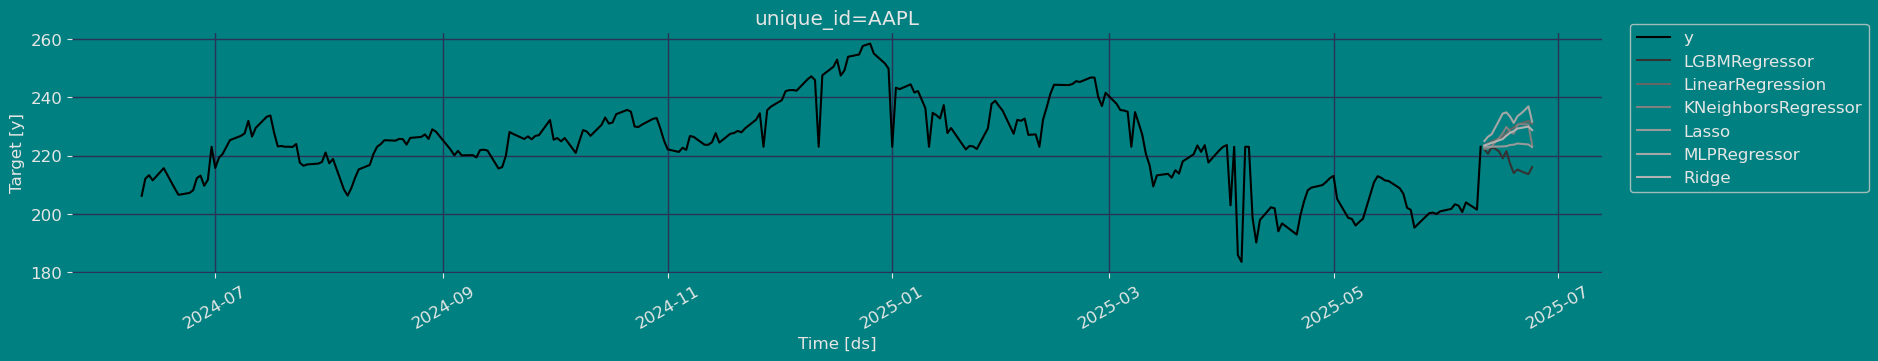

In [108]:
fig

In [109]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [110]:
mae, mse, rmse = evaluate_forecast(test['y'], y_hat_dict['mean'])

NameError: name 'y_hat_dict' is not defined

In [177]:
mae, mse, rmse

(12.777988528292495, 193.14048289404272, 13.897499159706495)

In [205]:
mstl_model = MSTL(season_length=[7,14,21], trend_forecaster=AutoARIMA(prediction_intervals=ConformalIntervals(h=21, n_windows=2)))


In [111]:
for i in tscv.split(df):
    train_index, test_index = i
    train, test = df.iloc[train_index], df.iloc[test_index]
    mstl_model.fit(train['y'])
    preds = mstl_model.predict(len(test))
    mae, mse, rmse = evaluate_forecast(test['y'], preds['mean'])
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
    print(f"Train size: {len(train)}, Test size: {len(test)}")

MAE: 3.58, MSE: 16.77, RMSE: 4.09
Train size: 65, Test size: 60
MAE: 5.90, MSE: 55.84, RMSE: 7.47
Train size: 125, Test size: 60


/home/kronos/anaconda3/envs/rapids-24.12/lib/python3.12/site-packages/statsforecast/arima.py:800: RuntimeWarning: divide by zero encountered in scalar divide
  fit["sigma2"] = np.nansum(fit["residuals"] ** 2) / (nstar - npar + 1)


MAE: 13.95, MSE: 309.14, RMSE: 17.58
Train size: 185, Test size: 60
MAE: 12.88, MSE: 250.32, RMSE: 15.82
Train size: 245, Test size: 60
MAE: 6.64, MSE: 70.81, RMSE: 8.41
Train size: 305, Test size: 60


In [112]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

In [113]:
from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)

In [122]:
# Create a list of models and instantiation parameters
models = [
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=7),
    HistoricAverage(),
    DOT(season_length=7)
]

In [115]:
from statsforecast.models import AutoCES


In [116]:
# Create a list of models and instantiation parameters
models = [
    AutoARIMA(),
    AutoETS(),
    AutoCES()
]

In [125]:
# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq='D', 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
)

In [126]:
df

,unique_id,ds,y
2024-06-11 00:00:00-04:00,AAPL,2024-06-11 00:00:00-04:00,206.185730
2024-06-12 00:00:00-04:00,AAPL,2024-06-12 00:00:00-04:00,212.078201
2024-06-13 00:00:00-04:00,AAPL,2024-06-13 00:00:00-04:00,213.242737
2024-06-14 00:00:00-04:00,AAPL,2024-06-14 00:00:00-04:00,211.500870
2024-06-15 00:00:00-04:00,AAPL,2024-06-15 00:00:00-04:00,212.887721
...,...,...,...
2025-06-06 00:00:00-04:00,AAPL,2025-06-06 00:00:00-04:00,203.919998
2025-06-07 00:00:00-04:00,AAPL,2025-06-07 00:00:00-04:00,203.096664
2025-06-08 00:00:00-04:00,AAPL,2025-06-08 00:00:00-04:00,202.273331
2025-06-09 00:00:00-04:00,AAPL,2025-06-09 00:00:00-04:00,201.449997


In [127]:
sf.fit(df)

StatsForecast(models=[HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta])

In [128]:
forecasts_df = sf.forecast(df=df, h=7)
forecasts_df.head()

,unique_id,ds,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
0,AAPL,2025-06-11 00:00:00-04:00,202.820007,204.292636,202.820007,223.506497,214.313338
1,AAPL,2025-06-12 00:00:00-04:00,200.630005,204.292636,200.630005,223.506497,213.834969
2,AAPL,2025-06-13 00:00:00-04:00,203.919998,204.292636,203.919998,223.506497,214.537874
3,AAPL,2025-06-14 00:00:00-04:00,203.096664,204.292636,203.096664,223.506497,213.861279
4,AAPL,2025-06-15 00:00:00-04:00,202.273331,204.292636,202.273331,223.506497,214.328610


In [238]:
forecasts_df.columns[2:]

Index(['HoltWinters', 'CrostonClassic', 'SeasonalNaive', 'HistoricAverage',
       'DynamicOptimizedTheta'],
      dtype='object')

In [129]:
for i in tscv.split(df):
    train_index, test_index = i
    train, test = df.iloc[train_index], df.iloc[test_index]
    sf.fit(train)
    preds = sf.predict(len(test))
    for i in ['HoltWinters',
       'CrostonClassic', 
       'SeasonalNaive', 
       'HistoricAverage', 
       'DynamicOptimizedTheta']:
        mae, mse, rmse = evaluate_forecast(test['y'], preds[i])
        print(f"MAE_{i}: {mae:.2f}, MSE_{i}: {mse:.2f}, RMSE_{i}: {rmse:.2f}")
        print(f"Train size: {len(train)}, Test size: {len(test)}")
    

MAE_HoltWinters: 8.08, MSE_HoltWinters: 84.00, RMSE_HoltWinters: 9.17
Train size: 65, Test size: 60
MAE_CrostonClassic: 7.75, MSE_CrostonClassic: 71.03, RMSE_CrostonClassic: 8.43
Train size: 65, Test size: 60
MAE_SeasonalNaive: 8.08, MSE_SeasonalNaive: 84.00, RMSE_SeasonalNaive: 9.17
Train size: 65, Test size: 60
MAE_HistoricAverage: 6.79, MSE_HistoricAverage: 56.12, RMSE_HistoricAverage: 7.49
Train size: 65, Test size: 60
MAE_DynamicOptimizedTheta: 3.40, MSE_DynamicOptimizedTheta: 15.04, RMSE_DynamicOptimizedTheta: 3.88
Train size: 65, Test size: 60
MAE_HoltWinters: 6.93, MSE_HoltWinters: 82.48, RMSE_HoltWinters: 9.08
Train size: 125, Test size: 60
MAE_CrostonClassic: 6.66, MSE_CrostonClassic: 75.61, RMSE_CrostonClassic: 8.70
Train size: 125, Test size: 60
MAE_SeasonalNaive: 6.93, MSE_SeasonalNaive: 82.48, RMSE_SeasonalNaive: 9.08
Train size: 125, Test size: 60
MAE_HistoricAverage: 10.26, MSE_HistoricAverage: 154.54, RMSE_HistoricAverage: 12.43
Train size: 125, Test size: 60
MAE_Dynam

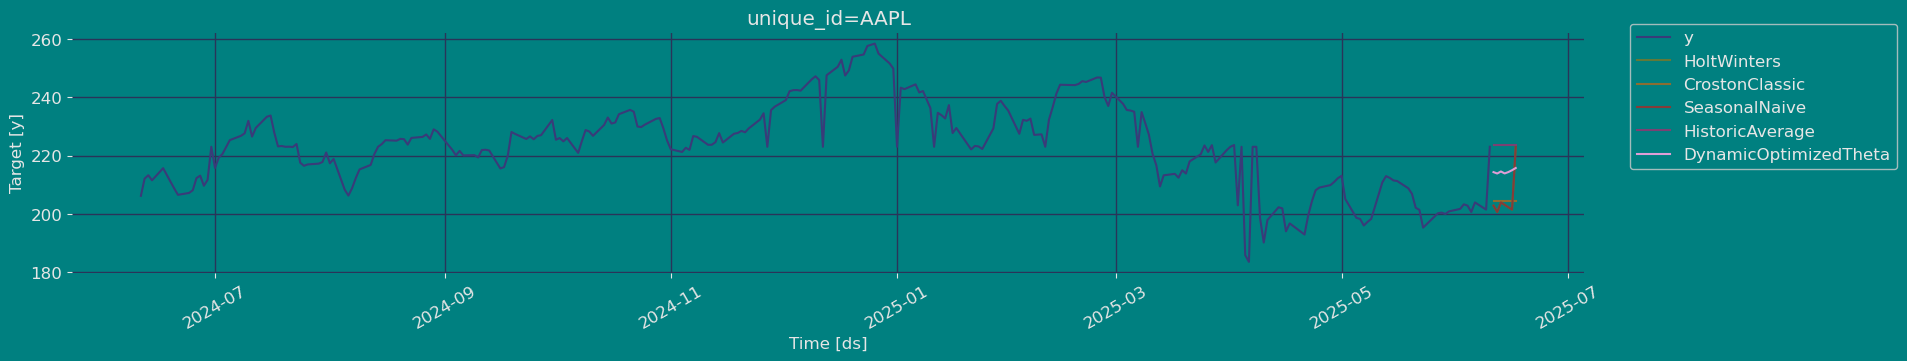

In [130]:
sf.plot(df,forecasts_df)

In [131]:
cv_df = sf.cross_validation(
    df=df,
    h=7,
    step_size=24,
    n_windows=2
)

In [132]:
cv_df.head()

,unique_id,ds,cutoff,y,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
0,AAPL,2025-05-11 00:00:00-04:00,2025-05-10 00:00:00-04:00,206.616664,200.780045,202.327606,200.780045,225.271661,200.847546
1,AAPL,2025-05-12 00:00:00-04:00,2025-05-10 00:00:00-04:00,210.789993,198.629532,202.327606,198.629532,225.271661,201.403550
2,AAPL,2025-05-13 00:00:00-04:00,2025-05-10 00:00:00-04:00,212.929993,198.250015,202.327606,198.250015,225.271661,202.128629
3,AAPL,2025-05-14 00:00:00-04:00,2025-05-10 00:00:00-04:00,212.330002,195.992981,202.327606,195.992981,225.271661,200.812928
4,AAPL,2025-05-15 00:00:00-04:00,2025-05-10 00:00:00-04:00,211.449997,197.231369,202.327606,197.231369,225.271661,200.441041


In [133]:
from utilsforecast.losses import mse

In [134]:
def evaluate_cv(df, metric):
    models = df.columns.drop(['unique_id', 'ds', 'y', 'cutoff']).tolist()
    evals = metric(df, models=models)
    evals['best_model'] = evals[models].idxmin(axis=1)
    return evals

In [135]:
evaluation_df = evaluate_cv(cv_df, mse)
evaluation_df.head()

,unique_id,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,best_model
0,AAPL,107.761661,69.649103,107.761661,304.687099,78.77803,CrostonClassic


In [136]:
evaluation_df['best_model'].value_counts().to_frame().reset_index()

,best_model,count
0,CrostonClassic,1


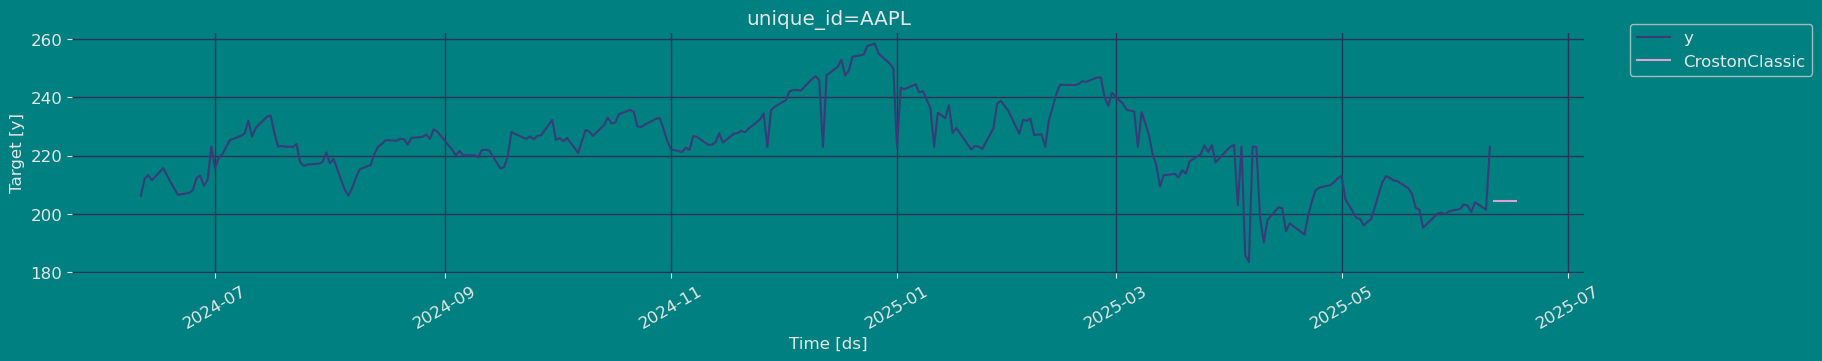

In [137]:
seasonal_ids = evaluation_df.query('best_model == "CrostonClassic"')['unique_id']
sf.plot(df,forecasts_df, unique_ids=seasonal_ids, models=["CrostonClassic"])

In [138]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    with_best = forecasts_df.merge(evaluation_df[['unique_id', 'best_model']])
    res = with_best[['unique_id', 'ds']].copy()
    for suffix in (''):
        res[f'best_model{suffix}'] = with_best.apply(lambda row: row[row['best_model'] + suffix], axis=1)
    return res

In [139]:
prod_forecasts_df = get_best_model_forecast(forecasts_df, evaluation_df)
prod_forecasts_df.head()

,unique_id,ds
0,AAPL,2025-06-11 00:00:00-04:00
1,AAPL,2025-06-12 00:00:00-04:00
2,AAPL,2025-06-13 00:00:00-04:00
3,AAPL,2025-06-14 00:00:00-04:00
4,AAPL,2025-06-15 00:00:00-04:00


In [140]:
df

,unique_id,ds,y
2024-06-11 00:00:00-04:00,AAPL,2024-06-11 00:00:00-04:00,206.185730
2024-06-12 00:00:00-04:00,AAPL,2024-06-12 00:00:00-04:00,212.078201
2024-06-13 00:00:00-04:00,AAPL,2024-06-13 00:00:00-04:00,213.242737
2024-06-14 00:00:00-04:00,AAPL,2024-06-14 00:00:00-04:00,211.500870
2024-06-15 00:00:00-04:00,AAPL,2024-06-15 00:00:00-04:00,212.887721
...,...,...,...
2025-06-06 00:00:00-04:00,AAPL,2025-06-06 00:00:00-04:00,203.919998
2025-06-07 00:00:00-04:00,AAPL,2025-06-07 00:00:00-04:00,203.096664
2025-06-08 00:00:00-04:00,AAPL,2025-06-08 00:00:00-04:00,202.273331
2025-06-09 00:00:00-04:00,AAPL,2025-06-09 00:00:00-04:00,201.449997


In [141]:
for i in tscv.split(df):
    train_index, test_index = i
    train, test = df.iloc[train_index], df.iloc[test_index]
    sf.fit(train)
    preds = sf.predict(len(test))
    for i in ['AutoARIMA',
       'AutoETS',
       'CES']:
        mae, mse, rmse = evaluate_forecast(test['y'], preds[i])
        print(f"MAE_{i}: {mae:.2f}, MSE_{i}: {mse:.2f}, RMSE_{i}: {rmse:.2f}")
        print(f"Train size: {len(train)}, Test size: {len(test)}")

KeyError: 'AutoARIMA'

In [ ]:
from statsforecast.models import SeasonalNaive

In [278]:
model = SeasonalNaive(season_length=7)
model = model.fit(y=df['y'])
y_hat_dict = model.predict(h=4)
y_hat_dict

{'mean': array([202.82000732, 200.63000488, 203.91999817, 203.09666443])}

In [279]:
for i in tscv.split(df):
    train_index, test_index = i
    train, test = df.iloc[train_index], df.iloc[test_index]
    model.fit(train['y'])
    preds = model.predict(h=len(test))
    mae, mse, rmse = evaluate_forecast(test['y'], preds['mean'])
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
        

MAE: 12.75, MSE: 184.06, RMSE: 13.57
MAE: 7.22, MSE: 88.60, RMSE: 9.41
MAE: 9.72, MSE: 131.19, RMSE: 11.45
MAE: 14.93, MSE: 373.48, RMSE: 19.33
MAE: 17.72, MSE: 395.05, RMSE: 19.88


In [287]:
from coreforecast.rolling import rolling_mean
season_length = rolling_mean(df['y'], window_size = 3)

<Axes: >

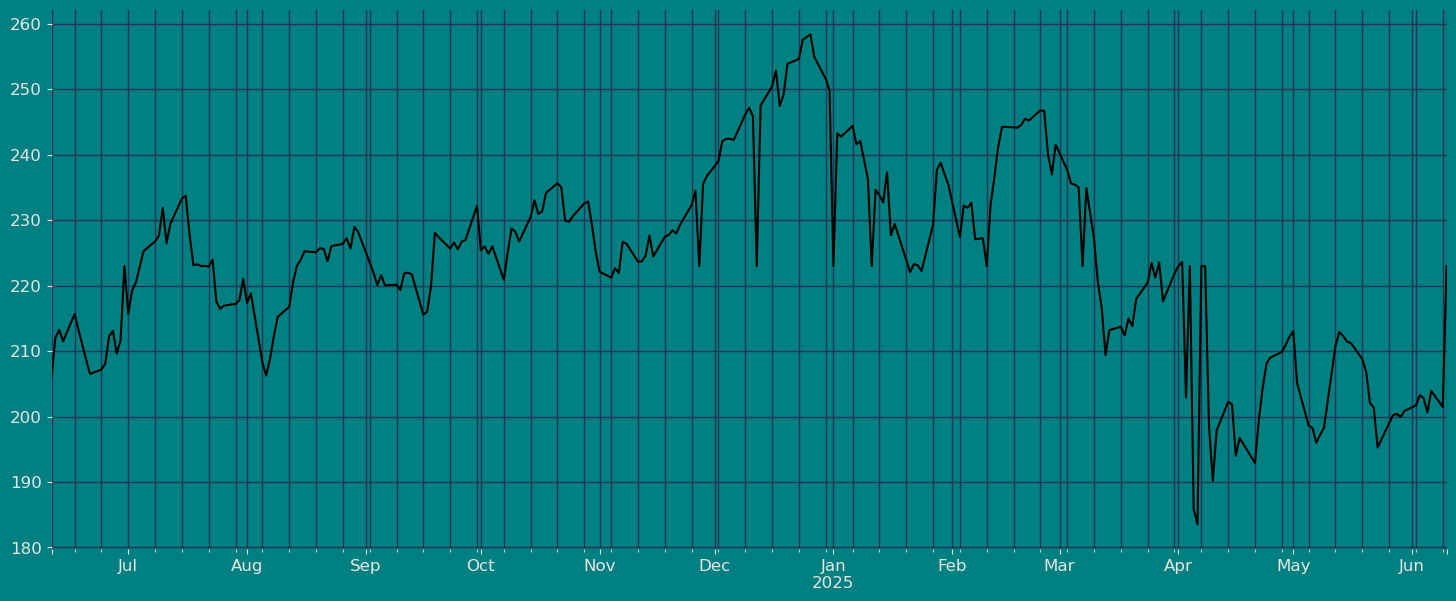

In [142]:
df['y'].plot()

In [143]:
df['y'][df['y']<190]

2025-04-05 00:00:00-04:00    185.829656
2025-04-06 00:00:00-04:00    183.526011
Freq: D, Name: y, dtype: float64

In [288]:
season_length

array([      nan,       nan, 203.49498, 210.5022 , 212.27393, 212.54378,
       212.88774, 214.27458, 214.4095 , 213.31738, 210.99821, 208.74211,
       207.32265, 206.73982, 206.95549, 207.40782, 209.17511, 211.15253,
       211.6668 , 211.47215, 211.67342, 213.70723, 216.231  , 218.50151,
       220.88867, 222.90259, 224.6555 , 225.77747, 226.26851, 226.88121,
       228.75688, 228.67393, 229.29103, 228.90839, 230.74756, 232.02824,
       233.02136, 231.61682, 228.22601, 224.739  , 223.18404, 223.14977,
       223.03365, 223.30461, 221.46764, 219.321  , 216.98193, 216.82048,
       217.03835, 217.13124, 217.37897, 218.68396, 218.72377, 219.07549,
       217.16774, 215.32304, 211.80946, 208.79024, 207.80153, 209.14192,
       212.13129, 214.43184, 215.745  , 216.25653, 217.83984, 219.40215,
       221.7904 , 223.37816, 224.7987 , 225.20506, 225.15192, 225.32243,
       225.47412, 225.02238, 225.132  , 225.3158 , 226.15839, 226.27132,
       226.62895, 226.4374 , 227.30434, 227.62654, 

In [294]:
import pandas as pd
from fastcore.test import test_fail
from utilsforecast.losses import smape
from statsforecast.feature_engineering import mstl_decomposition
from statsforecast.models import Naive


In [295]:
test_fail(lambda: mstl_decomposition(df, Naive(), 'D', 14), contains='must be an MSTL instance')

In [ ]:
acorr_ljungbox = acorr_ljungbox(sf.fitted_[0, 0].model_['mean'], lags=[6])

In [149]:
acorr_ljungbox

,lb_stat,lb_pvalue
6,NaN,NaN


In [150]:
len(sf.fitted_[0, 0].model_['fitted'])

65

In [155]:
sf.fitted_[0, 0].model_['fitted']

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan, 206.18572998,
       212.07820129, 213.24273682, 211.50086975, 212.88772074,
       214.27457174, 215.66142273, 213.29248047, 210.99822235,
       208.70396423, 206.52415466, 206.73981222, 206.95546977,
       207.17112732, 208.09680176, 212.25733948, 213.10339355,
       209.63957214, 211.67339579, 223.        , 215.74104309,
       219.24465942, 220.51870728, 222.902565  , 225.28642273,
       225.77746073, 226.26849874, 226.75953674, 227.61550903,
       231.89550781, 226.51069641, 229.46684265, 230.74752299,
       232.02820333, 233.30888367, 233.72695923, 227.81460571,
       223.13645935, 223.26585388, 223.        , 223.03362528,
       222.91751099, 223.96258545, 217.52270508, 216.47761536,
       216.94541931, 217.03831991, 217.1312205 , 217.22412109,
       217.78152466, 221.04623413, 217.34356689, 218.83657837,
       215.32300822, 211.80943807, 208.29586792, 206.26